In [ ]:
 
import random
import numpy as np
import torch

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
 
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.36314834 0.29031834 0.35188005 ... 0.23879085 0.33229677 0.17686343]
 [0.92179798 0.73692986 0.89319508 ... 0.60613501 0.84348585 0.44894149]
 [0.70973007 0.56739253 0.68770753 ... 0.46668821 0.64943435 0.34565846]
 ...
 [0.50424996 0.40312179 0.48860336 ... 0.33157325 0.46141098 0.24558388]
 [0.53008188 0.42377308 0.51363373 ... 0.34855922 0.48504833 0.25816475]
 [0.17923204 0.14328676 0.17367057 ... 0.11785534 0.16400523 0.08729103]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.39931194  0.22580636  0.38801961 ...  0.27919594  0.52091536
   0.19432122]
 [ 0.94755302  0.72948527  0.70131796 ...  0.6843173   0.71979078
   0.31689582]
 [ 0.76192423  0.597091    0.71275682 ...  0.53808826  0.69675812
   0.33837557]
 ...
 [ 0.61685498  0.39798242  0.31130011 ...  0.38288179  0.53392055
   0.29720171]
 [ 0.46593372  0.46696534  0.59367468 ...  0.36694418  0.66509944
   0.38205939]
 [ 0.20019798  0.09412314  0.25438282 ...  0.05957947 -0.07987649
   0.07

In [55]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")
from cEBMF import *

In [56]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [57]:
type(mycebmf)

cEBMF.cEBMF_object

In [58]:
K = np.min([K, U.shape[1]])
print(K)

5


In [59]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


[-0.23468807  0.15466735  0.0348464  -0.05578316 -0.1187848  -0.25886816
  0.11128473 -0.16875793  0.10428242  0.20359716  0.19527191 -0.02170304
 -0.13969882  0.00522036 -0.16679387 -0.03313421 -0.06505889  0.00167037
 -0.04155402  0.16551629  0.28284857 -0.02512568  0.18571958  0.20949115
 -0.01352916  0.01420956  0.02955717  0.42245737 -0.0126264  -0.01532278
 -0.10115603 -0.09980359 -0.2036891  -0.24250327 -0.16534331 -0.31098384
  0.4262268   0.2359233   0.11025511  0.0714774   0.281454    0.0166973
  0.2057076   0.21969293 -0.25479266  0.09523338 -0.4511553   0.10858149
 -0.09477472  0.13604194]
[ 0.23860554  0.09888099 -0.23648837 -0.184803   -0.22294891 -0.04672161
  0.23619062  0.12588991  0.16507702  0.1418682   0.1572835   0.16894934
  0.17487517  0.05108707 -0.20575345 -0.00293216 -0.12539625  0.30100968
  0.2608644   0.19681045  0.03218786 -0.04826643  0.08677072 -0.2141261
  0.14208932 -0.04517017 -0.12258543  0.04696883 -0.2206863  -0.09008001
 -0.14664844 -0.17898422  0

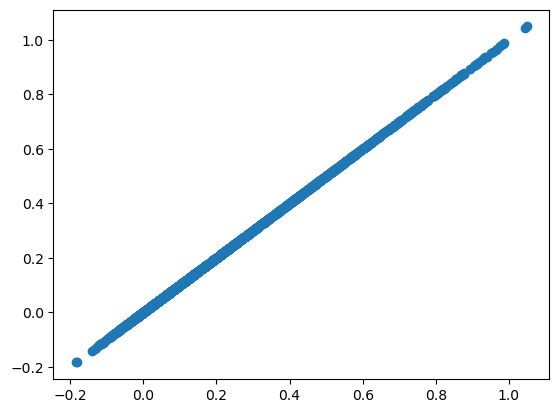

In [60]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

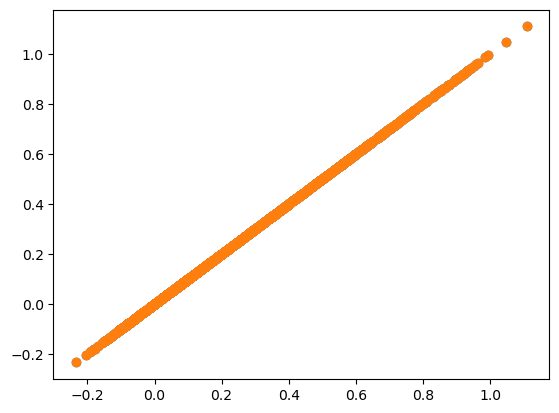

In [61]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [62]:
mycebmf.update_tau()
mycebmf.tau

array([[151.61635, 151.61635, 151.61635, ..., 151.61635, 151.61635,
        151.61635],
       [151.61635, 151.61635, 151.61635, ..., 151.61635, 151.61635,
        151.61635],
       [151.61635, 151.61635, 151.61635, ..., 151.61635, 151.61635,
        151.61635],
       ...,
       [151.61635, 151.61635, 151.61635, ..., 151.61635, 151.61635,
        151.61635],
       [151.61635, 151.61635, 151.61635, ..., 151.61635, 151.61635,
        151.61635],
       [151.61635, 151.61635, 151.61635, ..., 151.61635, 151.61635,
        151.61635]], dtype=float32)

In [63]:
mycebmf.prior_F

<function cEBMF.prior_norm(X, betahat, sebetahat, model_param)>

In [64]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

<function prior_norm at 0x000001055C1964D0>


In [65]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([-1.3491284 , -1.071811  , -1.2848426 , -1.2198983 , -0.8333281 ,
        -1.3331499 , -0.1003297 , -0.3322394 , -0.04767876, -0.4786057 ,
        -0.5815201 , -0.39393514, -1.1972959 , -0.57723117, -0.42846242,
        -0.75089365, -0.20092791, -1.1311718 , -0.03630184, -1.4283255 ,
        -1.0670213 , -0.33736646, -0.01470588, -1.1868174 , -1.0342678 ,
        -1.1075373 , -1.160422  , -0.06868521, -0.5032732 , -0.16317153,
        -1.2866219 , -0.91678053, -0.51980036, -0.02749395, -0.44651577,
        -0.4609443 , -1.0077769 , -0.90326107, -1.2765255 , -0.695348  ],
       dtype=float32),
 array([0.03066312, 0.03066312, 0.03066312, 0.03066312, 0.03066312,
        0.03066312, 0.03066312, 0.03066312, 0.03066312, 0.03066312,
        0.03066312, 0.03066312, 0.03066312, 0.03066312, 0.03066312,
        0.03066312, 0.03066312, 0.03066312, 0.03066312, 0.03066312,
        0.03066312, 0.03066312, 0.03066312, 0.03066312, 0.03066312,
        0.03066312, 0.03066312, 0.03066312, 0.030663

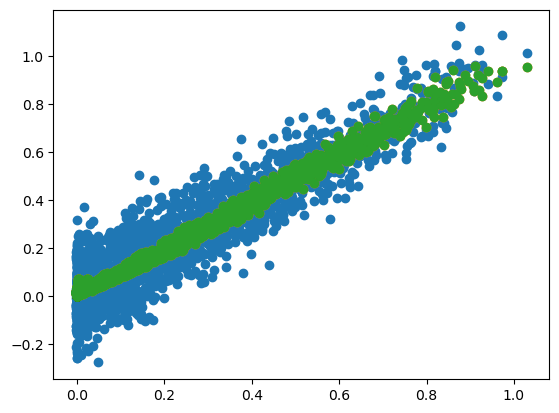

In [66]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


In [67]:
np.sqrt(np.mean(mycebmf.Y_fit- rank_1_matrix)**2)
          

0.0016339743661453955

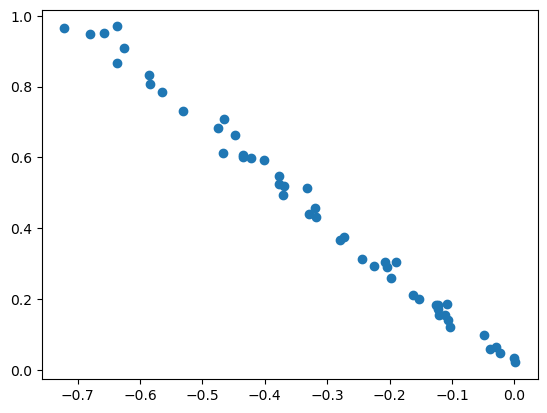

In [68]:
plt.scatter(mycebmf.L[:,0], u)

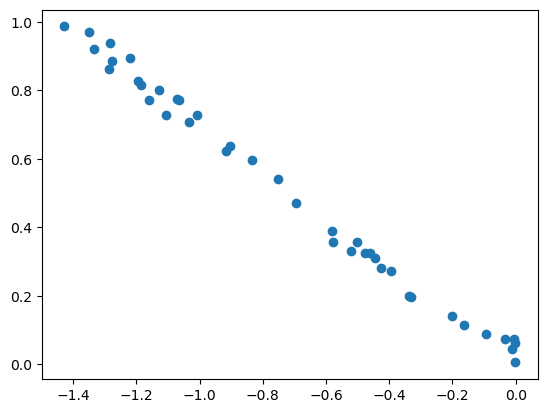

In [69]:
plt.scatter(mycebmf.F[:,0], v)

In [70]:
mycebmf.L[:,1]

array([-2.9971781e-09,  2.1811384e-09,  5.8899724e-10, -5.9425115e-10,
       -1.4906297e-09, -3.3848677e-09,  1.4354549e-09, -1.9975048e-09,
        1.4548818e-09,  2.7875300e-09,  2.5360780e-09, -1.0116890e-10,
       -1.6299706e-09,  1.1091488e-10, -2.1175430e-09, -3.8776082e-10,
       -7.7185436e-10,  1.2463815e-10, -4.4118034e-10,  2.1950972e-09,
        3.9187613e-09, -2.9043332e-10,  2.4727804e-09,  2.8135134e-09,
       -8.4336593e-11,  3.3533457e-10,  4.1800560e-10,  6.1883112e-09,
       -5.0605731e-11, -1.8863609e-10, -1.1718631e-09, -1.2414496e-09,
       -2.6422433e-09, -2.9838672e-09, -1.9281163e-09, -4.0006225e-09,
        6.2014096e-09,  3.1117087e-09,  1.5438655e-09,  1.0023300e-09,
        3.7819632e-09,  3.1386446e-10,  2.6788636e-09,  3.0586451e-09,
       -3.3028615e-09,  1.3414521e-09, -6.5047576e-09,  1.4927471e-09,
       -1.1059818e-09,  1.7779108e-09], dtype=float32)

In [71]:
for i in range(40):
    mycebmf.iter()

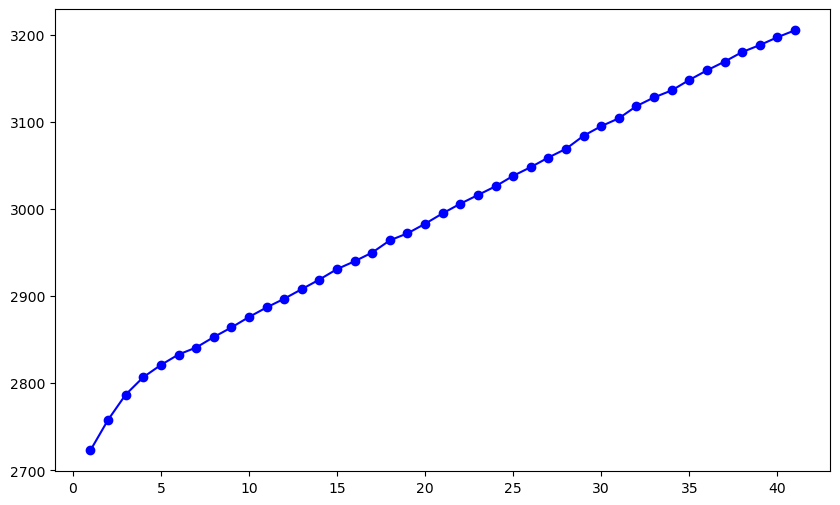

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj) , marker='o', linestyle='-', color='b')

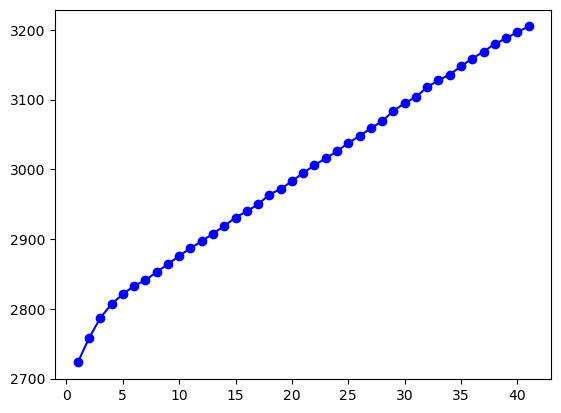

In [73]:
plt.plot(np.array(mycebmf.obj) , marker='o', linestyle='-', color='b')

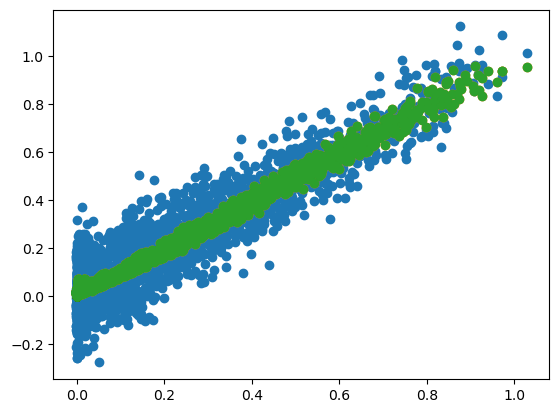

In [74]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix) 
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [81]:
mycebmf.L[:,0:5]==0
 

array([[False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  Tr